In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import scipy.special as sp
import os 
%matplotlib inline
dblsize = [0.86*6.4,0.86*2.86312]


%config InlineBackend.figure_format = 'svg' 
# plot style
from dgutils import colors as colortools

In [2]:
filenames=os.listdir('../data/ed')
filenamesdmrg = os.listdir('../data/dmrg')

In [3]:
filenames.remove('.ipynb_checkpoints')
filenamesdmrg.remove('.ipynb_checkpoints')

In [4]:
def loaddata(α,v):
    nN=[]
    N=[]
    ent=[] 
    for i in range(len(filenames)):    
        fn = filenames[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8:
            with open('../data/ed/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/ed/'+fn,encoding="utf-8")    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                nN.append(n/Nval)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    for i in range(len(filenamesdmrg)):    
        fn = filenamesdmrg[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8:
            with open('../data/dmrg/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/dmrg/'+fn,encoding="utf-8")    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                ratio = n/Nval
                nN.append(ratio)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    return N, nN, ent

In [24]:
def sinefit(ratio,A,B,C,D):
    x=np.sin(np.pi*ratio)
    return A*x**4+B*x**3+C*x**2+D*x

In [37]:
def scatterplotdiffa(N, nN, ent,color):
    ratiosed = []
    entangNed =[]
    ratiosdmrg = []
    entangNdmrg =[]
    for i in range(len(ent)):
        if nN[i] <= .5:
            if i < (len(filenames)):
                ratiosed.append(nN[i])
                ratiosed.append(1-nN[i])
                entangNed.append(ent[i]/N[i])
                entangNed.append(ent[i]/N[i])
            else:
                ratiosdmrg.append(nN[i])
                ratiosdmrg.append(1-nN[i])
                entangNdmrg.append(ent[i]/N[i])
                entangNdmrg.append(ent[i]/N[i])
    ratios = np.array(ratiosed+ratiosdmrg)
    entang = np.array(entangNed+entangNdmrg)
    entang=entang.reshape((-1,))
    fit, cov=curve_fit(sinefit,ratios,entang)
    ratiox=np.linspace(0,1,1000)
    ax2.plot(ratiox,sinefit(ratiox,*fit),linewidth=.5,color=color)
    ax2.scatter(ratiosed,entangNed,s=3,marker='D',c=colortools.get_alpha_hex(color,0.5),zorder=10, edgecolors=color,label=rf'$\alpha={α}$')
    ax2.scatter(ratiosdmrg,entangNdmrg,s=3,marker='D',c=colortools.get_alpha_hex(color,0.5),zorder=10, edgecolors=color)

In [38]:
def scatterplotdiffv(N, nN, ent,color,marker):
    ratiosed = []
    entangNed =[]
    ratiosdmrg = []
    entangNdmrg =[]
    for i in range(len(ent)):
        if nN[i] <= .5:
            if i < (len(filenames)):
                ratiosed.append(nN[i])
                ratiosed.append(1-nN[i])
                entangNed.append(ent[i]/N[i])
                entangNed.append(ent[i]/N[i])
            else:
                ratiosdmrg.append(nN[i])
                ratiosdmrg.append(1-nN[i])
                entangNdmrg.append(ent[i]/N[i])
                entangNdmrg.append(ent[i]/N[i])
    ratios = np.array(ratiosed+ratiosdmrg)
    entang = np.array(entangNed+entangNdmrg)
    entang=entang.reshape((-1,))
    fit, cov=curve_fit(sinefit,ratios,entang)
    ratiox=np.linspace(0,1,1000)
    ax1.plot(ratiox,sinefit(ratiox,*fit),linewidth=.5,color=color)
    ax1.scatter(ratiosed,entangNed,s=3,marker=marker,c=colortools.get_alpha_hex(color,0.5),zorder=10, edgecolors=color,label=rf'$V/J={v}$')
    ax1.scatter(ratiosdmrg,entangNdmrg,s=3,marker=marker,c=colortools.get_alpha_hex(color,0.5),zorder=10, edgecolors=color)

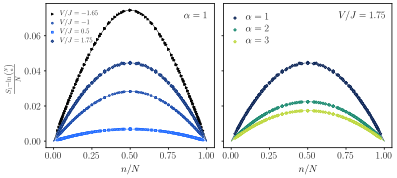

In [47]:
colors=["#0B2456","#1A896F","#bdd73c"]
vlist=[-1.65,-1,.5,1.75]
colorsalpha1={-1.65:'#000000',1.75:'#113782',-1:'#1749AD',.5:'#216BFF'}
markers={-1.65:'>',-1:'o',.5:'s',1.75:'D'}
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    fig, axs = plt.subplots(1,2,sharey=True, constrained_layout=True, figsize=dblsize, sharex=False)
    #plt.subplots_adjust(wspace=.05) 
    ax1 = axs[0]
    for α in [1]:
        for v in vlist:
            N,nN,ent=loaddata(α,v)
            scatterplotdiffv(N,nN,ent,colorsalpha1[v],markers[v])
            nval = []
            for j in range(len(nN)):
                nval.append((nN[j]*N[j],N[j]))
            #ax1.plot(ratios,np.max(ent)*np.sin(np.pi*ratios)/14,linewidth=.5,color=colorsalpha1[v])
        ax1.legend(loc="upper center",bbox_to_anchor=(.18,1),fontsize=7,handletextpad=.3,handlelength=1.5,handleheight=.2,labelspacing=.3,)
        ax1.set_xlabel(r'$n/N$')
        ax1.set_ylabel(r'$\frac{S_1-\ln{N \choose n}}{N}$')
        ax1.text(.85,.07,r'$\alpha=1$')
    ax2=axs[1]
    for v in [1.75]:
        for i,α in enumerate(alphas):
            N,nN,ent=loaddata(α,v)
            scatterplotdiffa(N,nN,ent,colors[i])
            nval = []
            for j in range(len(nN)):
                nval.append((nN[j]*N[j],N[j]))
            #ax2.plot(ratios,np.max(ent)*np.sin(np.pi*ratios)/14,linewidth=.5,color=colors[i])
    ax2.legend(loc="upper center",bbox_to_anchor=(.15,1),fontsize=10,handletextpad=.3,handlelength=1.5,handleheight=.2,labelspacing=.3)
    ax2.set_xlabel(r'$n/N$')
    ax2.text(.7,.07,r'$V/J=1.75$')
    plt.savefig('../figures/Fig11_fulldataset.pdf')
    plt.show()